<a href="https://colab.research.google.com/github/chrisseub/HackBio-Internship/blob/main/SURPRISE_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA FILES

In [8]:
DATASET_ONE = pd.read_csv('/content/hbr_uhr_top_deg_normalized_counts.csv')
display(DATASET_ONE.head())

,Unnamed: 0,HBR_1,HBR_2,HBR_3,UHR_1,UHR_2,UHR_3
0,SULT4A1,375.0,343.6,339.4,3.5,6.9,2.6
1,MPPED1,157.8,158.4,162.6,0.7,3.0,2.6
2,PRAME,0.0,0.0,0.0,568.9,467.3,519.2
3,IGLC2,0.0,0.0,0.0,488.6,498.0,457.5
4,IGLC3,0.0,0.0,0.0,809.7,313.8,688.0


In [9]:
DATASET_TWO = pd.read_csv('/content/hbr_uhr_deg_chr22_with_significance.csv')
display(DATASET_TWO.head())

,name,log2FoldChange,PAdj,-log10PAdj,significance
0,SYNGR1,-4.6,5.200000e-217,216.283997,down
1,SEPT3,-4.6,4.500000e-204,203.346787,down
2,YWHAH,-2.5,4.700000e-191,190.327902,down
3,RPL3,1.7,5.400000e-134,133.267606,ns
4,PI4KA,-2.0,2.900000e-118,117.537602,down


PART A - GENE EXPRESSION ANALYSIS

<Figure size 1000x800 with 0 Axes>

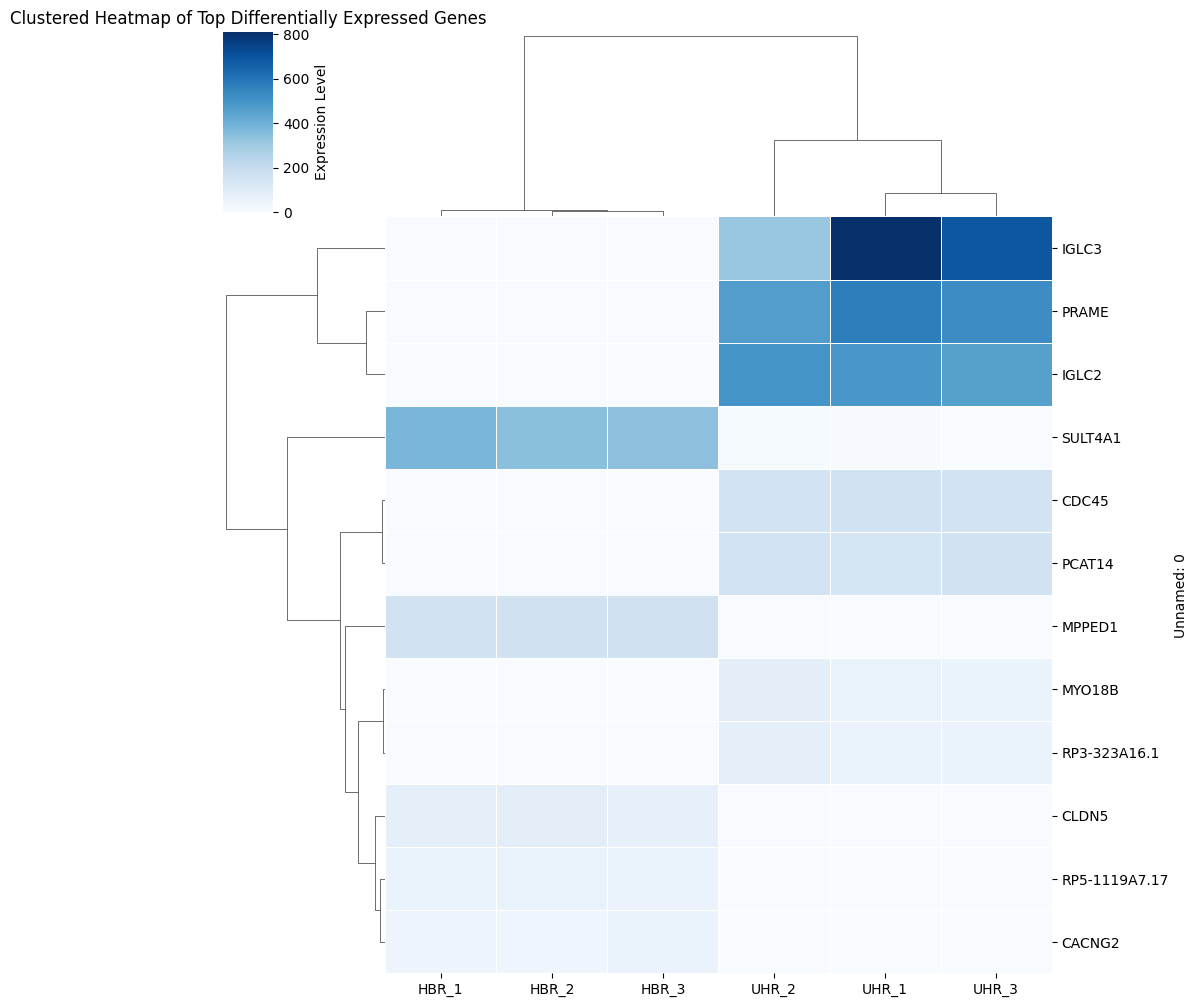

In [11]:
plt.figure(figsize=(10, 8))
sns.clustermap(DATASET_ONE,
               cmap='Blues',
               linewidths=.5,
               cbar_kws={'label': 'Expression Level'})
plt.title('Clustered Heatmap of Top Differentially Expressed Genes')
plt.show()

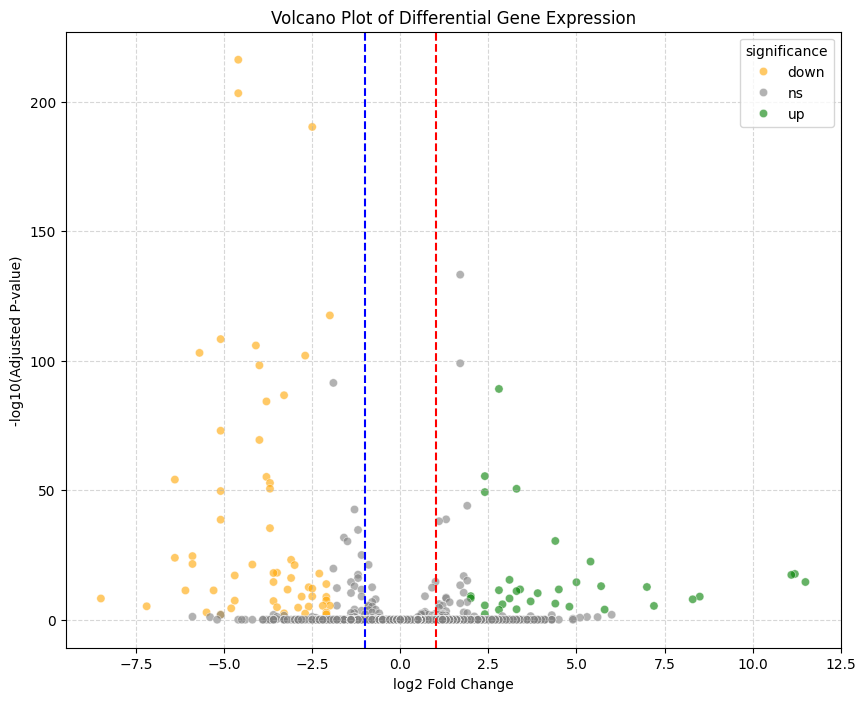

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='log2FoldChange',
    y='-log10PAdj',
    hue='significance',
    palette={'up': 'green', 'down': 'orange', 'ns': 'grey'},
    data=DATASET_TWO,
    alpha=0.6
)
plt.axvline(x=1, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=-1, color='blue', linestyle='--', linewidth=1.5)
plt.title('Volcano Plot of Differential Gene Expression')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(Adjusted P-value)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Part B – Breast Cancer Data Exploration

IMPORTING THE THIRD DATASET

In [13]:
import pandas as pd

DATASET_THREE = pd.read_csv('/content/data-3.csv')
display(DATASET_THREE.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


SCATTER PLOT (RADIUS VS TEXTURE)

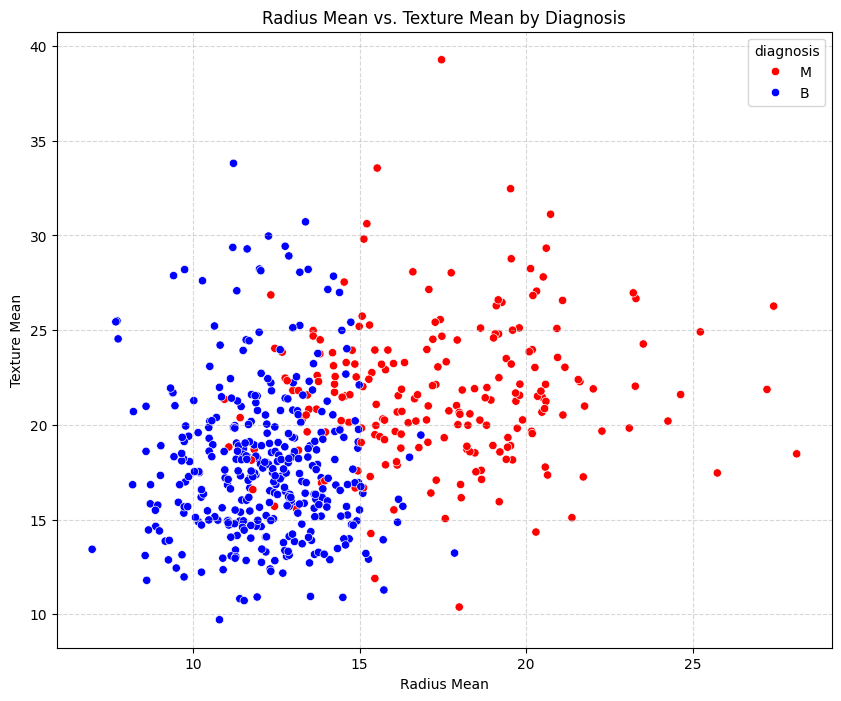

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='radius_mean',
    y='texture_mean',
    hue='diagnosis',
    data=DATASET_THREE,
    palette={'M': 'red', 'B': 'blue'}
)
plt.title('Radius Mean vs. Texture Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

CORRELATION HEATMAP

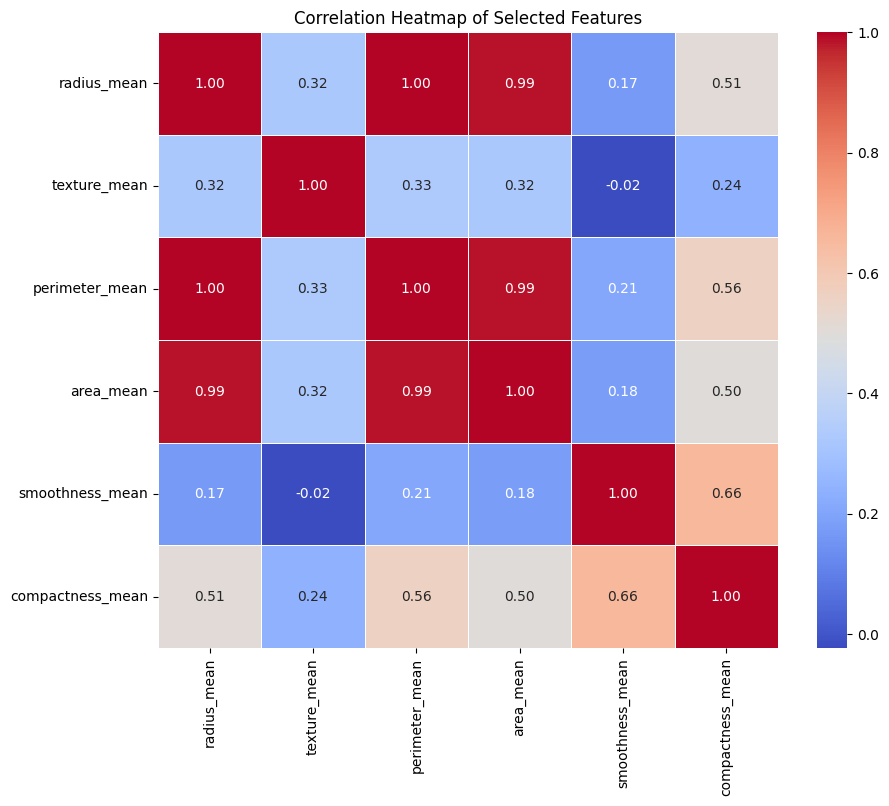

In [16]:
selected_columns = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean'
]

correlation_matrix = DATASET_THREE[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

SCATTER PLOT (SMOOTHNESS VS COMPACTNESS)

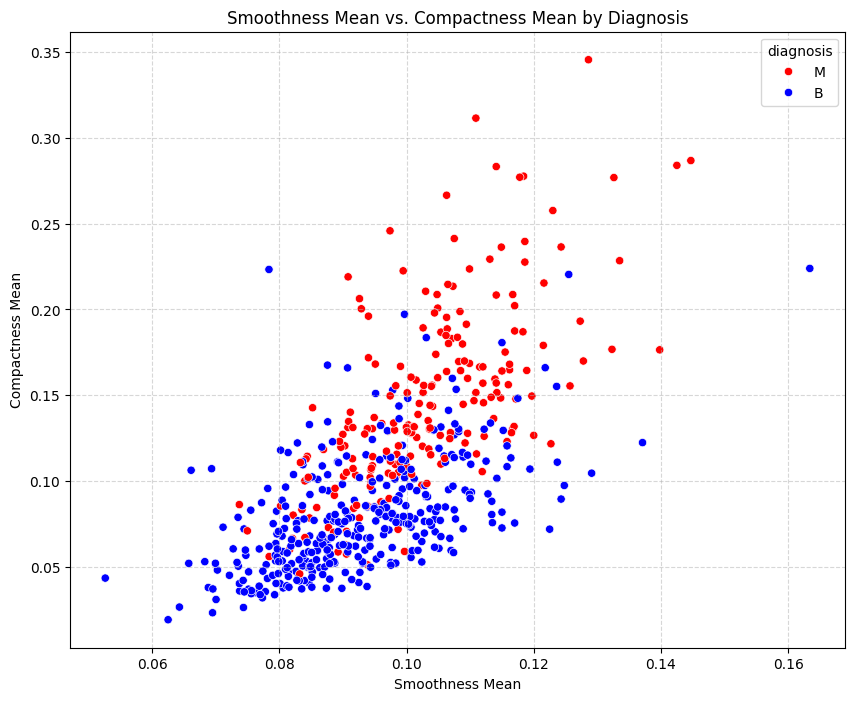

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='smoothness_mean',
    y='compactness_mean',
    hue='diagnosis',
    data=DATASET_THREE,
    palette={'M': 'red', 'B': 'blue'}
)
plt.title('Smoothness Mean vs. Compactness Mean by Diagnosis')
plt.xlabel('Smoothness Mean')
plt.ylabel('Compactness Mean')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

DENSITY PLOT (AREA DISTRIBUTION)

/tmp/ipython-input-3966905801.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diagnosis')


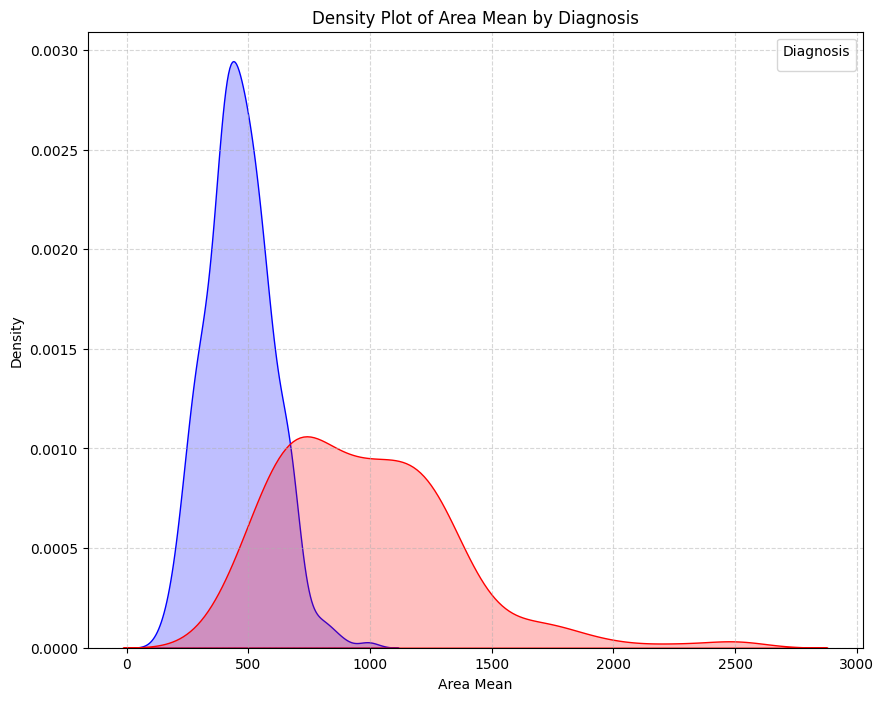

In [18]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x='area_mean',
    hue='diagnosis',
    data=DATASET_THREE,
    fill=True,
    common_norm=False,
    palette={'M': 'red', 'B': 'blue'}
)
plt.title('Density Plot of Area Mean by Diagnosis')
plt.xlabel('Area Mean')
plt.ylabel('Density')
plt.legend(title='Diagnosis')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()